In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:

df_cleaned = df.drop(columns=["id", "diagnosis", "Unnamed: 32"])

<Axes: title={'center': 'Class Distribution'}>

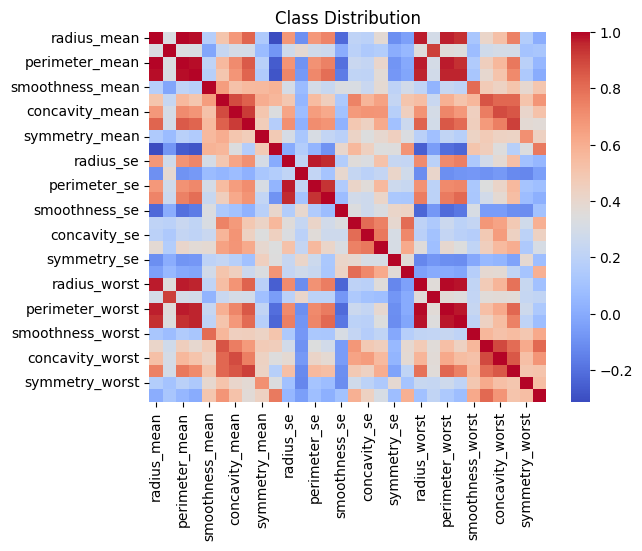

In [7]:
df.describe()
df['diagnosis'].value_counts().plot(kind='bar', title='Class Distribution')
sns.heatmap(df_cleaned.corr(), cmap='coolwarm')


In [61]:
from sklearn.model_selection import train_test_split

# Encode the target
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and labels
X = df.drop(columns=["id", "diagnosis", "Unnamed: 32"])
y = df['diagnosis_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, stratify=y #Without stratify → Unbalanced splits → Skewed results
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

--------------------------------------------------
KNN Accuracy: 0.9912
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------------------------------------
Support Vector Machine Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00    

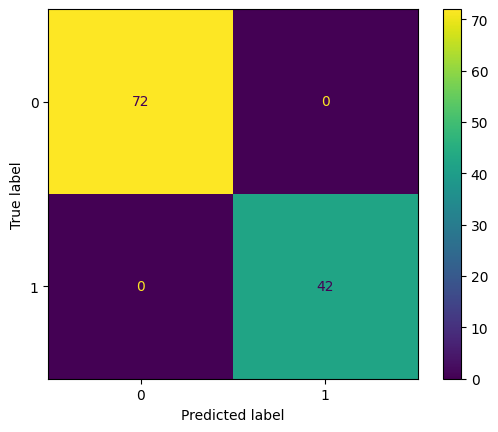

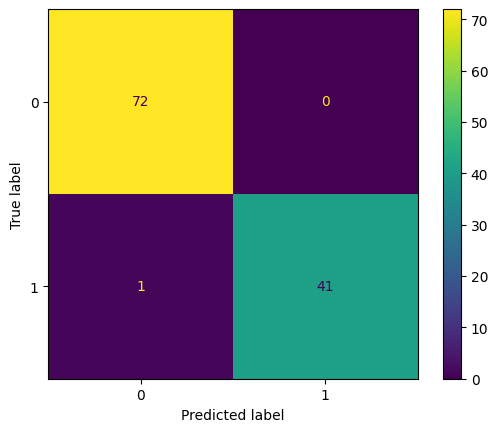

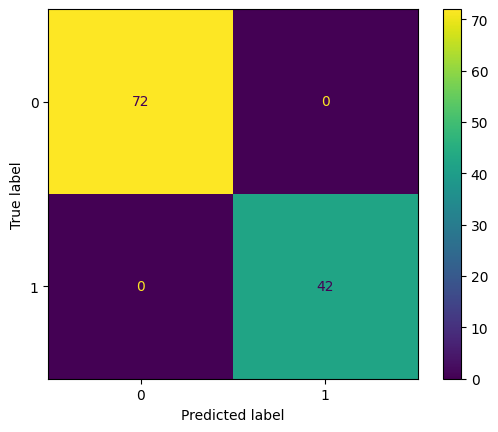

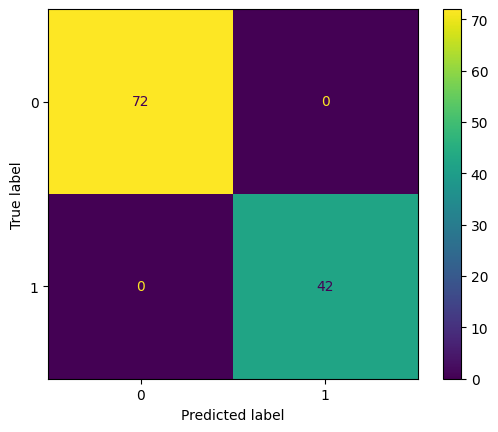

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix)
    disp.plot()
    print('-'*50)


In [64]:
from sklearn.metrics import confusion_matrix

print(y.value_counts(normalize=True))  # are classes balanced?


diagnosis_encoded
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [68]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[name] = scores.mean()
    print(f"{name} Mean CV Accuracy: {scores.mean():.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Mean CV Accuracy: 0.9191
KNN Mean CV Accuracy: 0.9279
Support Vector Machine Mean CV Accuracy: 0.9122
Decision Tree Mean CV Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


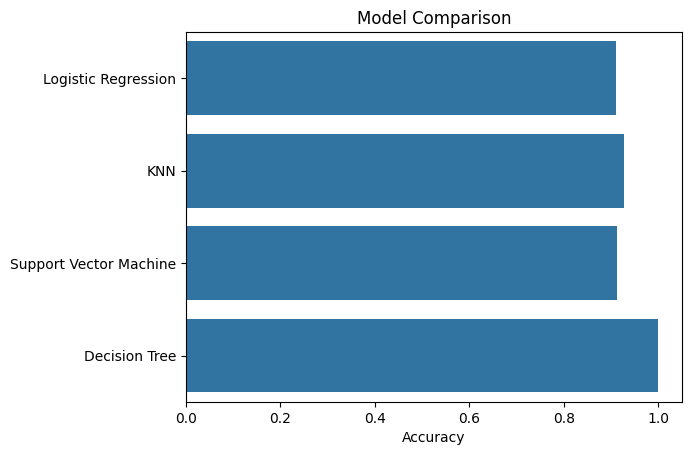

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=accuracies, y=model_names)
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()


we are gonna use GMM so i will drop the label

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)


Text(0.5, 1.0, 'BIC to Choose Optimal Number of Clusters')

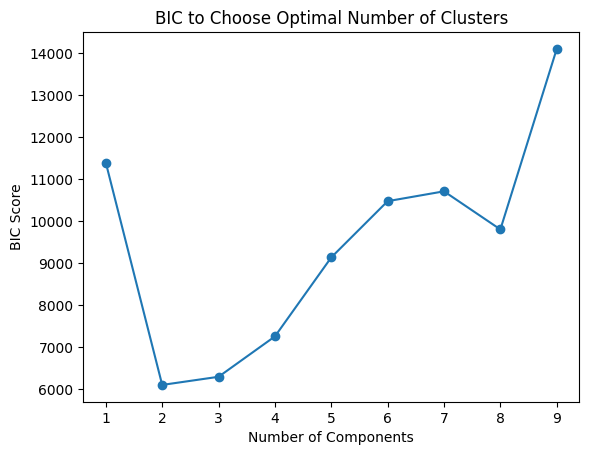

In [9]:
bic = []
for k in range(1, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))

plt.plot(range(1, 10), bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC to Choose Optimal Number of Clusters')


Find the minimum point it is the Lower BIC = better model (up to a point) — it penalizes overfitting.



In [81]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['GMM_Cluster'] = gmm_labels


In [82]:
# Map diagnosis to numeric values
diagnosis_numeric = df['diagnosis'].map({'M': 1, 'B': 0})

# Confusion Matrix
cm = confusion_matrix(diagnosis_numeric, df['GMM_Cluster'])
ari = adjusted_rand_score(diagnosis_numeric, df['GMM_Cluster'])

print("Confusion Matrix:\n", cm)
print("Adjusted Rand Index:", ari)


Confusion Matrix:
 [[ 18 339]
 [196  16]]
Adjusted Rand Index: 0.7740159832538671


Text(0.5, 1.0, 'Mean Feature Values by Cluster')

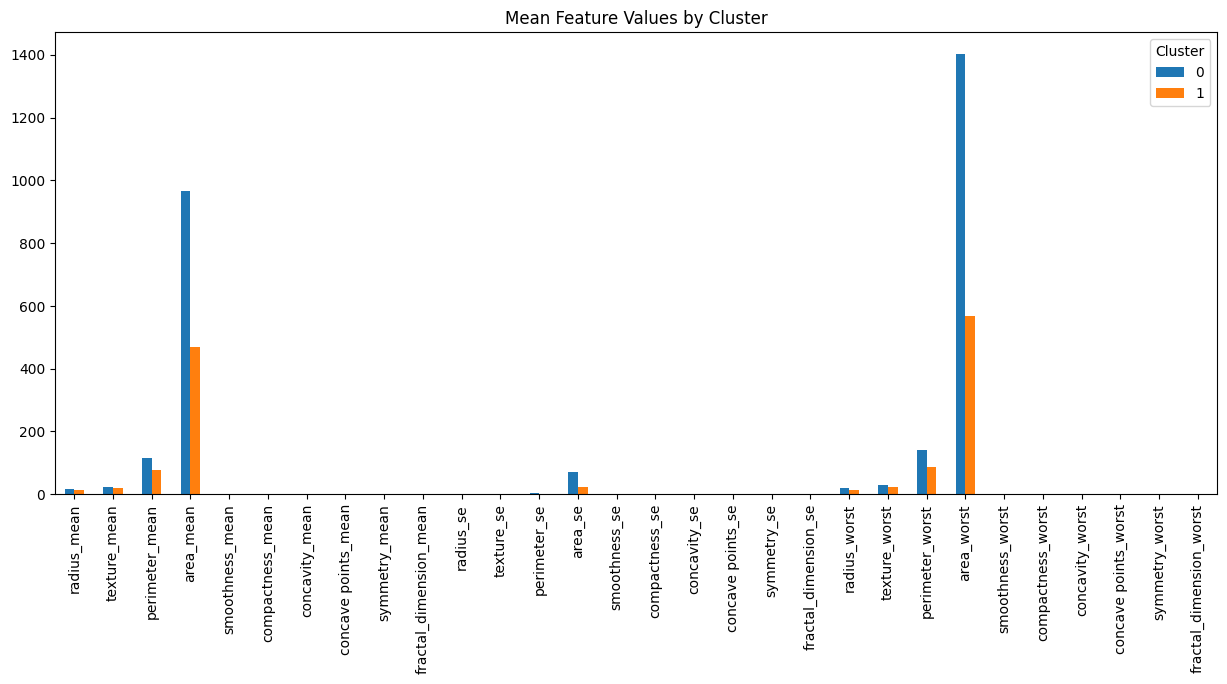

In [83]:
df_cleaned['Cluster'] = gmm_labels
cluster_means = df_cleaned.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(15,6))
plt.title('Mean Feature Values by Cluster')


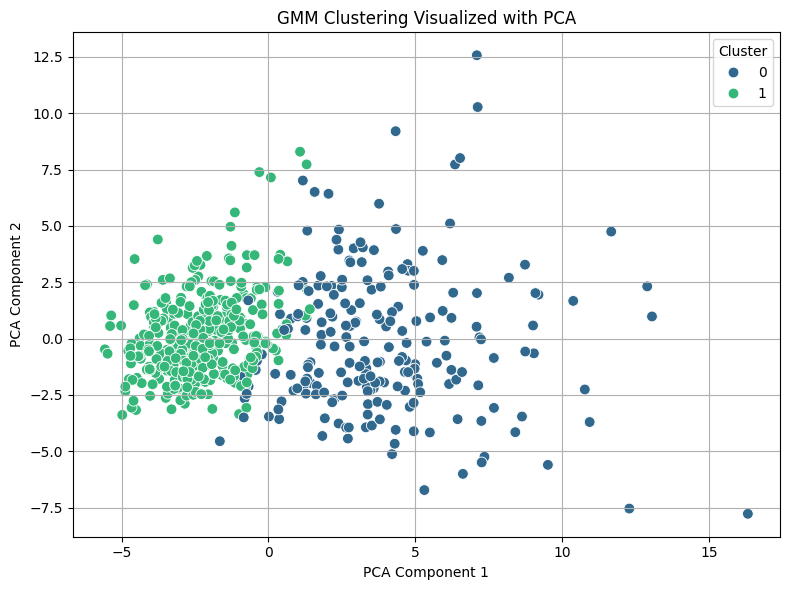

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['GMM_Cluster'], palette="viridis", s=60)
plt.title('GMM Clustering Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("GMM ARI:", adjusted_rand_score(diagnosis_numeric, gmm_labels))
print("KMeans ARI:", adjusted_rand_score(diagnosis_numeric, kmeans_labels))


GMM ARI: 0.7740159832538671
KMeans ARI: 0.676504895633523
